In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary

|Variable|	Definition	|Key
|--------|--------|--------|
|survival|	Survival	|0 = No, 1 = Yes
|pclass|	Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd (1 is upper class)
|sex|	Sex	|
|Age|	Age in years	 - age can be fractional for children less than 1 year old|
|sibsp|	# of siblings / spouses aboard the Titanic	 |
|parch|	# of parents / children aboard the Titanic	|
|ticket|	Ticket number	|
|fare|	Passenger fare|
|cabin|	Cabin number	|
|embarked|	Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton

- sibsp: The dataset defines family relations in this way...
    - Sibling = brother, sister, stepbrother, stepsister
    - Spouse = husband, wife (mistresses and fiancés were ignored)
- parch: The dataset defines family relations in this way...
    - Parent = mother, father
    - Child = daughter, son, stepdaughter, stepson </br>
Some children travelled only with a nanny, therefore parch=0 for them.

# Performing EDA

In [3]:
df.shape

(891, 12)

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
12*.4

4.800000000000001

- youngest on the ship was 4.8 months old (or .42 years old)
- oldest: 80 years old
- average of survived (0 or 1) indicates the percentage of survived passengers
- What if not having a ticket number indicates a crew member

In [6]:
df['Ticket'].isna().sum()

0

Looks like all passengers are customers and not crew members

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [15]:
df['Embarked'].value_counts(normalize=True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

<Axes: xlabel='Embarked'>

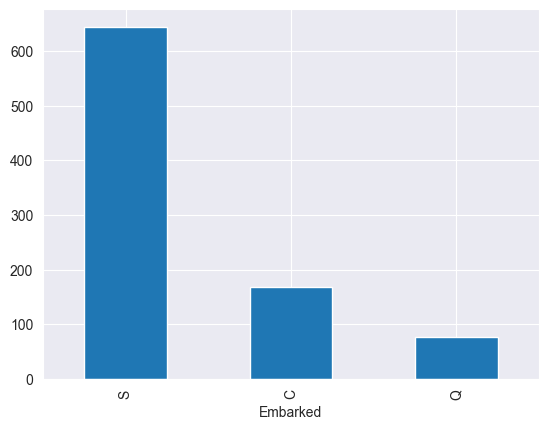

In [19]:
df['Embarked'].value_counts().plot(kind='bar')

In [17]:
df['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

The average of a binary (0,1) column, will always show the percentage of 1 in the data.

<Axes: xlabel='Age'>

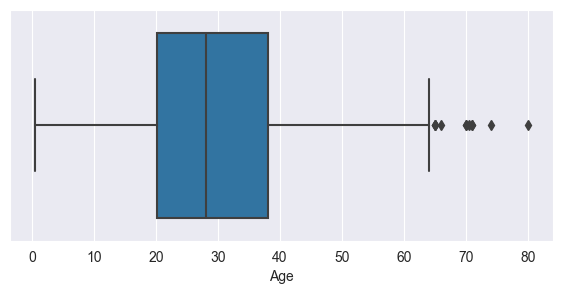

In [23]:
plt.figure(figsize=(7,3))
sns.boxplot(x=df['Age'])

<Axes: xlabel='Embarked', ylabel='count'>

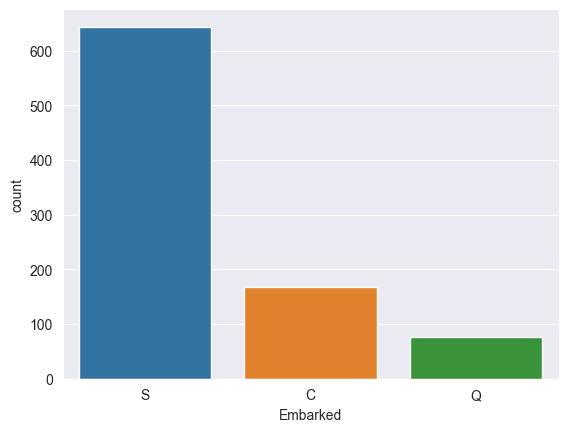

In [26]:
sns.countplot(x=df['Embarked'])

<Axes: xlabel='Embarked', ylabel='count'>

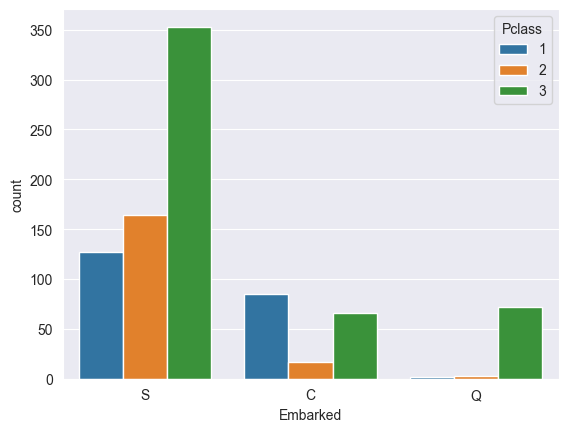

In [28]:
sns.countplot(x=df['Embarked'], hue=df['Pclass'])

<Axes: xlabel='Pclass', ylabel='count'>

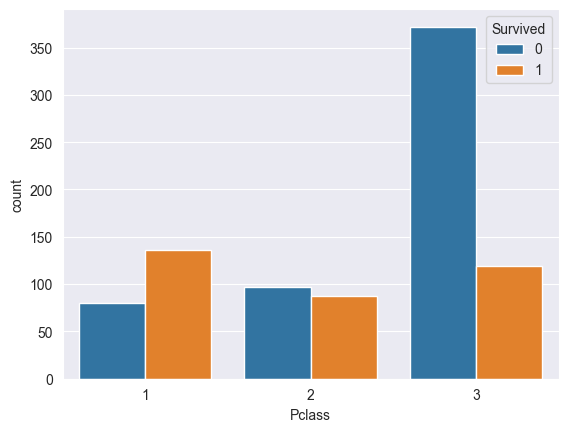

In [35]:
sns.countplot(x=df['Pclass'],hue=df['Survived'])

<Axes: xlabel='Embarked', ylabel='count'>

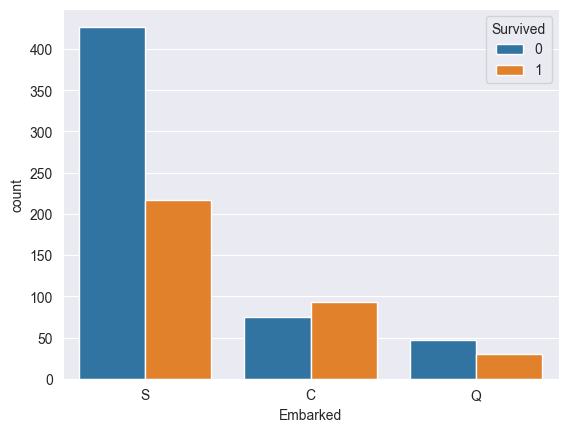

In [36]:
sns.countplot(x=df['Embarked'],hue=df['Survived'])

Let's find out the % of people survived by Embarkation port

<Axes: ylabel='Survived'>

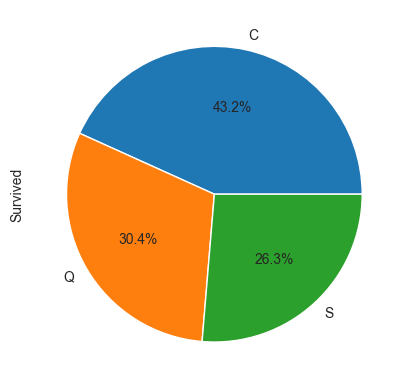

In [34]:
df.groupby('Embarked')['Survived'].mean().plot(kind='pie', autopct='%.1f%%')

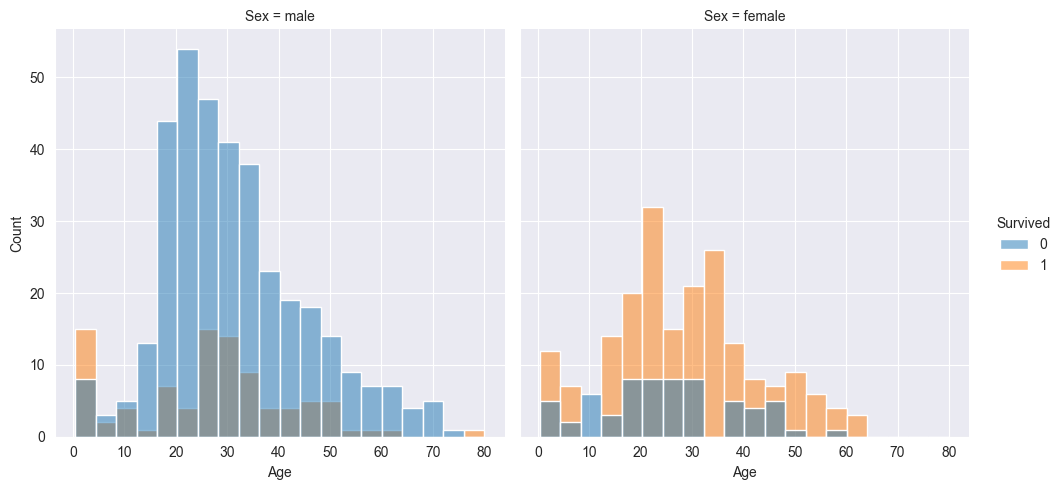

In [42]:
sns.displot(x=df['Age'], col=df['Sex'], hue=df['Survived'])

- Viz above proves the common knowledge that women, children, and old people had more chance of survival because they were placed first on rescue boats
- Based on our knowledge of the Titanic (similar to domain expertise) we can trust this sample dataset

In [43]:
df['Sex'].value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

#### get the rate(%) of survival for males compared to females


In [47]:
total_males = len(df[df['Sex']=='male'])
mask = (df['Sex']=='male') & (df['Survived']==1)
survived_males = len(df[mask])

In [53]:
print('Percentage of males survived:',round(survived_males/total_males,3)*100,'%')

Percentage of males survived: 18.9 %


#### Alternative Method

In [52]:
df.groupby('Sex').agg({"Survived": "mean"})

,Survived
Sex,
female,0.742038
male,0.188908


In [55]:
df.groupby('Sex')['Survived'].agg(['mean', 'count'])

,mean,count
Sex,,
female,0.742038,314
male,0.188908,577


In [56]:
# get the % of survivors that are children (0 to 12 yrs old)
total_children = len(df[df['Age']<=12])
mask = (df['Age']<=12) & (df['Survived']==1)
survived_children = len(df[mask])

print(survived_children/total_children)

0.5797101449275363


## Data Cleansing and Preprocessing

- Encoding of categorical variables
- Feature Extraction
- Trim out outliers
- Null treatment (Imputation)
- Feature Selection


### Encoding

In [57]:
cat_features = df.select_dtypes(exclude=['int','float']).columns #include=['object']
cat_features

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [58]:
# we'll perform onehotencoding or get_dummies on Sex and Embarked because they are not ordinal

df = pd.get_dummies(df, columns=['Sex','Embarked'], dtype=int)

In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [61]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

### Imputation

In [63]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [64]:
age_median = df['Age'].median()
df['Age'] = df['Age'].fillna(age_median)
df.isna().sum()
#df['Age'].fillna(age_median, inplace=True) works too

PassengerId      0
Survived         0
Pclass           0
Name             0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Sex_female       0
Sex_male         0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
dtype: int64

In [67]:
# more sophisticated method - replace missing values of names that have 'master' with the overall average of names with 'master
mask = df['Name'].str.contains('Master')

df[mask].sample(15)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
788,789,1,3,"Dean, Master. Bertram Vere",1.00,1,2,C.A. 2315,20.5750,NaN,0,1,0,0,1
340,341,1,2,"Navratil, Master. Edmond Roger",2.00,1,1,230080,26.0000,F2,0,1,0,0,1
16,17,0,3,"Rice, Master. Eugene",2.00,4,1,382652,29.1250,NaN,0,1,0,1,0
348,349,1,3,"Coutts, Master. William Loch ""William""",3.00,1,1,C.A. 37671,15.9000,NaN,0,1,0,0,1
278,279,0,3,"Rice, Master. Eric",7.00,4,1,382652,29.1250,NaN,0,1,0,1,0
63,64,0,3,"Skoog, Master. Harald",4.00,3,2,347088,27.9000,NaN,0,1,0,0,1
489,490,1,3,"Coutts, Master. Eden Leslie ""Neville""",9.00,1,1,C.A. 37671,15.9000,NaN,0,1,0,0,1
125,126,1,3,"Nicola-Yarred, Master. Elias",12.00,1,0,2651,11.2417,NaN,0,1,1,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",2.00,3,1,349909,21.0750,NaN,0,1,0,0,1
305,306,1,1,"Allison, Master. Hudson Trevor",0.92,1,2,113781,151.5500,C22 C26,0,1,0,0,1


### Binning

In [69]:
# bucket our age groups into numerical intervals
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 65, 99],  labels = [1,2,3,4]) # encoding 4 intervals into 4 labels (ordinal encoding)

In [70]:
df['AgeBin'].unique()

[3, 1, 2, 4]
Categories (4, int64): [1 < 2 < 3 < 4]

### Feature Extraction

In [75]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1
#evaluation
df[['FamilySize','Parch','SibSp']].sample(10)

,FamilySize,Parch,SibSp
464,1,0,0
765,2,0,1
199,1,0,0
498,4,2,1
425,1,0,0
878,1,0,0
548,3,1,1
182,7,2,4
535,3,2,0
96,1,0,0


In [76]:
# create a column that indicates if the passenger was traveling alone or not
import numpy as np
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)
df[['FamilySize','Parch','SibSp', 'IsAlone']].sample(10)

,FamilySize,Parch,SibSp,IsAlone
374,5,1,3,0
39,2,0,1,0
31,2,0,1,0
853,2,1,0,0
200,1,0,0,1
610,7,5,1,0
43,4,2,1,0
807,1,0,0,1
320,1,0,0,1
51,1,0,0,1


In [77]:
# another method: 
df['IsAlone'] = df['FamilySize'].map(lambda x: 1 if x==1 else 0)
df[['FamilySize','Parch','SibSp', 'IsAlone']].sample(10)


,FamilySize,Parch,SibSp,IsAlone
154,1,0,0,1
313,1,0,0,1
541,7,2,4,0
201,11,2,8,0
86,5,3,1,0
468,1,0,0,1
485,5,1,3,0
141,1,0,0,1
536,1,0,0,1
783,4,2,1,0


Do passengers that travel alone have more chances of survival?

<Axes: ylabel='IsAlone'>

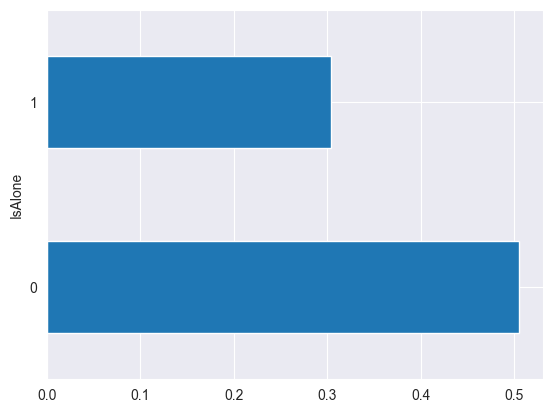

In [79]:
df.groupby(['IsAlone'])['Survived'].mean().plot(kind='barh')

- It seems the passengers that traveled alone had less chances of survival
- children do not travel alone, women do not travel alone most of the time
- maybe that's another indicator that women and children had more priority

<Axes: ylabel='IsAlone'>

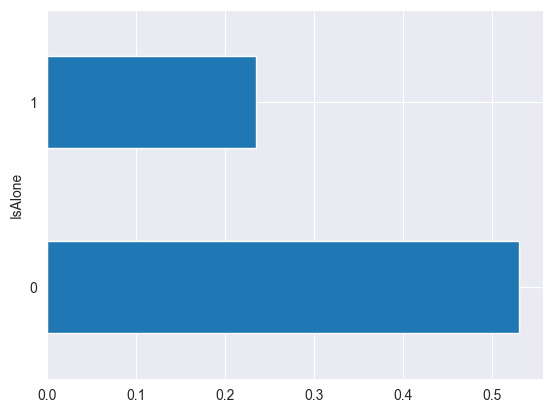

In [81]:
df.groupby(['IsAlone'])['Sex_female'].mean().plot(kind='barh')

In [83]:
df.groupby(['IsAlone'])['Sex_male'].mean()

IsAlone
0    0.468927
1    0.765363
Name: Sex_male, dtype: float64

In [84]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'AgeBin', 'FamilySize', 'IsAlone'],
      dtype='object')

## Splitting the Data for ML

Let's say we're happy with the features that we put together and are done with preprocessing. Next, we need to split our data.

- first split: Features vs Target (X vs y)
- second split: Train vs Test

In [85]:
# features (feature selection)
X = df[['Pclass',  'Age', 
       'Fare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'AgeBin', 'FamilySize', 'IsAlone']]

# target
y = df['Survived']

### Normalization or Standardization

`MinMaxScaler()` vs `StandardScaler()`

In [86]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [89]:
data = np.array([1,2,3,4,5,6,7,8,9]).reshape(-1,1)
data

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [90]:
MMS = MinMaxScaler()
MMS_scaled = MMS.fit_transform(data)
MMS_scaled

array([[0.   ],
       [0.125],
       [0.25 ],
       [0.375],
       [0.5  ],
       [0.625],
       [0.75 ],
       [0.875],
       [1.   ]])

In [91]:
SS = StandardScaler()
SS_scaled = SS.fit_transform(data)
SS_scaled

array([[-1.54919334],
       [-1.161895  ],
       [-0.77459667],
       [-0.38729833],
       [ 0.        ],
       [ 0.38729833],
       [ 0.77459667],
       [ 1.161895  ],
       [ 1.54919334]])


| Feature | MinMaxScaler | StandardScaler |
|---|---|---|
| Range | Scales the data to a fixed range, typically between 0 and 1 | Scales the data to have a mean of 0 and a standard deviation of 1 |
| Distribution | Not sensitive to the distribution of the data | Sensitive to the distribution of the data |
| Outliers | Sensitive to outliers | Not sensitive to outliers |
| Use cases | Good for datasets with a large range of values or neural networks| Good for datasets with a normal distribution or regression models|


In [93]:
# Let's perform MinMaxScaler (normalization) on our Titanic features

MMS = MinMaxScaler()

X_scaled = MMS.fit_transform(X)
X_scaled

array([[1.        , 0.27117366, 0.01415106, ..., 0.66666667, 0.1       ,
        0.        ],
       [0.        , 0.4722292 , 0.13913574, ..., 0.66666667, 0.1       ,
        0.        ],
       [1.        , 0.32143755, 0.01546857, ..., 0.66666667, 0.        ,
        1.        ],
       ...,
       [1.        , 0.34656949, 0.04577135, ..., 0.66666667, 0.3       ,
        0.        ],
       [0.        , 0.32143755, 0.0585561 , ..., 0.66666667, 0.        ,
        1.        ],
       [1.        , 0.39683338, 0.01512699, ..., 0.66666667, 0.        ,
        1.        ]])

In [119]:
# second split
# we need to split our data into training data for ML training and testing data for ML evaluation
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=5) 
# if you don't specify, the function uses 25% by default
# most common ratios: 75:25 and 80:20
# use a specific random state number when collaborating with others to get the same results

In [120]:
X.shape

(891, 11)

In [121]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 11) (223, 11) (668,) (223,)


Now our data is ready for our machine learning model 

## Building a Model

In [122]:
from sklearn.linear_model import LogisticRegression

# define the model
LR = LogisticRegression()

# train the model
#based on X features learn how to predict y target
LR.fit(X_train, y_train)

LogisticRegression()

In [123]:
# For evaluation, make the prediction using the trained model on the testing data
X_test_pred = LR.predict(X_test)
X_test_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1])

In [127]:
X_test[0]

array([1.        , 0.34656949, 0.01512699, 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.66666667, 0.        ,
       1.        ])

In [124]:
X_test_pred.shape

(223,)

In [125]:
#Evaluate the model based on predicted testing data
score = LR.score(X_test, y_test) #y_test here is my actual values. (prediction vs actual)
print('Accuracy:', score)

Accuracy: 0.8295964125560538


Accuracy score common assumptions:
- 90% is high and very good result
- 80% or higher is good
- 70% or higher is acceptable
- between 60% and 70% is considered poor or low accuracy

Additional Algos to Cosider
- Naive Bayes Classifier
- SVM Support Vector Machines
- Decision Trees
- Random Forest Classifier 
- Gradient Boosting